In [103]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

In [121]:
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

In [8]:
# variable information
information = pd.DataFrame(cdc_diabetes_health_indicators.variables)
pd.set_option('display.max_colwidth', None)
information[['name', 'type', 'description', 'missing_values']]

,name,type,description,missing_values
0,ID,Integer,Patient ID,no
1,Diabetes_binary,Binary,0 = no diabetes 1 = prediabetes or diabetes,no
2,HighBP,Binary,0 = no high BP 1 = high BP,no
3,HighChol,Binary,0 = no high cholesterol 1 = high cholesterol,no
4,CholCheck,Binary,0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years,no
5,BMI,Integer,Body Mass Index,no
6,Smoker,Binary,Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes,no
7,Stroke,Binary,(Ever told) you had a stroke. 0 = no 1 = yes,no
8,HeartDiseaseorAttack,Binary,coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes,no
9,PhysActivity,Binary,physical activity in past 30 days - not including job 0 = no 1 = yes,no


Many of the variables are binary types. I use MinMaxScaler() to scale them, and I normalize the rest of the variables to have values between 0 and 1.

In [37]:
X.sample(5)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
3402,1,0,1,0.209302,0,0,0,1,1,1,0,1,0,0.00,0.0,0.0,0,1,0.666667,0.6,1.000000
235834,0,1,1,0.162791,0,0,0,1,1,1,0,1,0,0.25,0.0,0.0,0,0,0.833333,0.8,0.714286
189203,1,1,1,0.162791,0,0,1,1,0,1,0,1,0,0.00,0.0,0.0,0,1,0.583333,1.0,1.000000
7675,1,0,1,0.162791,0,0,0,1,1,1,0,1,0,0.25,0.0,0.0,0,0,0.750000,1.0,0.571429
44261,0,0,1,0.139535,0,0,0,1,1,1,0,1,0,0.00,0.0,1.0,0,1,0.416667,1.0,1.000000


In [122]:
X[["BMI", "GenHlth", "MentHlth", "PhysHlth", "Age", "Education", "Income"]] = X.loc[:, ["BMI", "GenHlth", "MentHlth", "PhysHlth", "Age", "Education", "Income"]].astype(float)

C:\Users\diana\AppData\Local\Temp\ipykernel_34108\1119102845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[["BMI", "GenHlth", "MentHlth", "PhysHlth", "Age", "Education", "Income"]] = X.loc[:, ["BMI", "GenHlth", "MentHlth", "PhysHlth", "Age", "Education", "Income"]].astype(float)


In [123]:
scaler = MinMaxScaler()
X.iloc[:, [3, 13, 14, 15, 18, 19, 20]]  = scaler.fit_transform(X.iloc[:, [3, 13, 14, 15, 18, 19, 20]])

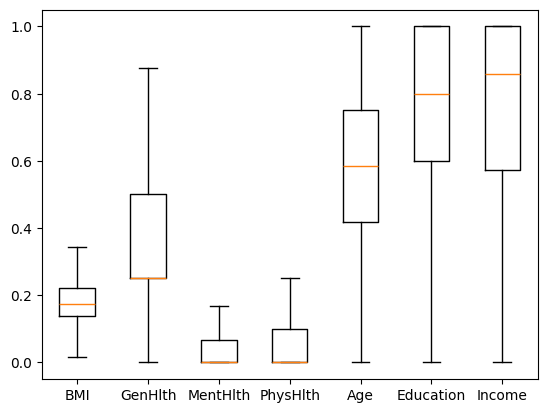

In [126]:
plt.boxplot(X[["BMI", "GenHlth", "MentHlth", "PhysHlth", "Age", "Education", "Income"]], 
            tick_labels=["BMI", "GenHlth", "MentHlth", "PhysHlth", "Age", "Education", "Income"])
plt.show()

*BMI, Mental and Physical Health* have many outliers. To solve this problem I change this values to max or min values.
length of box = 3rd quantile - 1st quantile
Max value = 3rd quantile + 1.5\*length of box
Min value = 1st quantile + 1.5\*length of box

In [125]:
def outliers_change(df, column):
    q1 = df[column].quantile(0.25) 
    q3 = df[column].quantile(0.75)
    box_length = q3 - q1
    max_value = q3 + 1.5 * box_length
    min_value = q1 - 1.5 * box_length 

    df.loc[:, (column)] = np.clip(df[column], min_value, max_value)

for col in ["BMI", "GenHlth", "MentHlth", "PhysHlth"]:
    outliers_change(X, col)

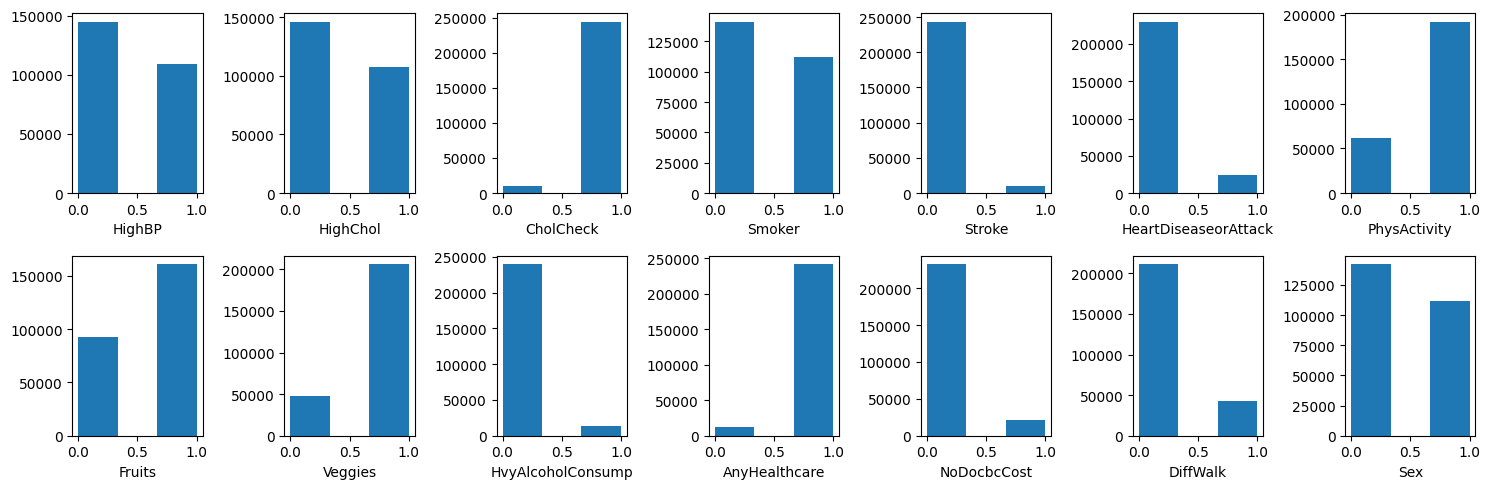

In [138]:
fig, ax = plt.subplots(2, 7, figsize=(15, 5))
axes_flat = ax.flatten()
for i, (column, ax) in enumerate(zip(['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex'], axes_flat)):
    X[column].plot.hist(ax=ax, bins=3)
    ax.set_xlabel(column, fontsize = 10)
    ax.set_ylabel('')
plt.tight_layout()
plt.show()

By looking at the rest of the data, we can also learn more about the group being studied.
- there are more people with lower blood pressure and cholesterol levels,
- most people have had their cholesterol checked in the past five years,
- there are slightly more non-smokers,
- people who have had a stroke or heart attack are a small percentage of the group,
- almost 4 times as many people have done physical activity outside of work in the last 30 days and the number of people who eat at least one vegetable a day is also similar;
- it's interesting that more people eat vegetables every day than fruit.
- the vast majority do not drink alcohol often and have health insurance.
- a small percentage of people needed medical assistance but were unable to seek it due to the cost.
- most people had no problems climbing stairs or taking demanding walks.
- the data includes slightly more women than men.


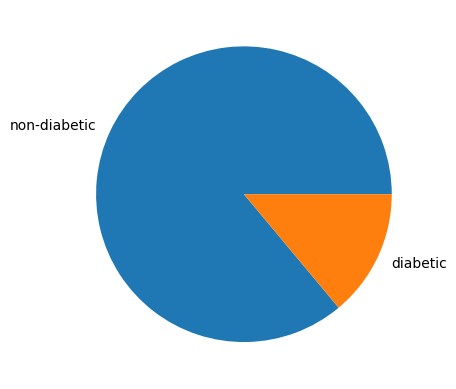

In [98]:
plt.pie(y.value_counts() , labels=['non-diabetic', 'diabetic'])
plt.show()

The number of people with diabetes is small compared to the overall population. So, it's important to check not only the accurate, but also the precise and recall.